# Data extraction from images.

1.   List item
2.   List item



Here we mount our drive to load the datasets which were stored in our drive.

The datasets here we have are image datasets which has text in it.
Now data is extracted using pytesseracct library and we will store the extracted text into a extracted.csv file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Now we are installing the libraries which are needed for the text extraction from images.

In [ ]:
!pip install pillow pytesseract opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,805 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
!pip install tesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562572 sha256=d83d82e610f042b08e98740e981a55d3b28daae6190cbbb9bdd76c725b05789c
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


Here text is extracted from images and stored in a .csv file.(with column name and serial numbers).

In [ ]:
import csv
from PIL import Image
import pytesseract
import cv2
import os
import numpy as np

# Set the path to the directory containing the images
path = '/content/drive/MyDrive/Datasets/Avatar Reviews/avatar_train'
# Initialize a list to store the extracted text
text_all = []
# Loop over all the images in the directory
for i, filename in enumerate(os.listdir(path)):
    if filename.endswith('.jpg'):
        # Load the image using PIL
        img = Image.open(os.path.join(path, filename)).convert('RGB')
        img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
        # Check if the image is loaded correctly
        if img is None:
            print('Error: Could not load image', filename)
            continue
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Apply thresholding
        _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # Apply OCR
        text = pytesseract.image_to_string(thresh)
        # Append the extracted text to the list as a dictionary
        text_all.append({'serial': i, 'text': text})
# Save the list as a CSV file
with open(os.path.join(path, 'extracted_text.csv'), 'w', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=['serial', 'text'])
    writer.writeheader()
    writer.writerows(text_all)

# Print the contents of the CSV file to the console
with open(os.path.join(path, 'extracted_text.csv'), 'r') as f:
    print(f.read())


serial,text
0,"1 loved the 1st film and I've just come out of the cinema watching the 2nd film. I am
heartbroken and sad because the story has so many plot conveniences and doesn't really

go anywhere. There isn't really anything at stake, the plot was written by a beginner and
has no depth.
"
1,"Compare this to, say, Harry Potter 2. The story was multilayered and compelling. The
characters were lovable and emotionally engaging. The visuals were artistically beautiful
and infused with meaning
"
2,"Given the success of the original Avatar, writing an excellent script (even if it meant
hiring others) should have been priority number 1. All this talk about pushing the limits of
CGI and camera technology, underwater filming etc... Totally worthless if the story and
characters are bland.
"
3,"Avatar 2 is so inferior to Avatar 1, I could not stress that enough. It is missing so many
elements that made the first movie, with an absolutely empty pointless story that seems
to be mish-mashed i

# Assigning sentiments to the each review.

Here we are downloading the requireds packages to find the  sentiments of the each review.

In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Now sentiments(positve or negative or neutral) were added for every review in the existed .csv file to the column named as "sentiment".

In [ ]:
import os
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Path to the CSV file
csv_path = "/content/drive/MyDrive/Datasets/Avatar Reviews/avatar_train/extracted_text.csv"

# Read the CSV file into a pandas dataframe
df = pd.read_csv(csv_path)

# Perform sentiment analysis for each row in the 'text' column
sentiments = []
for index, row in df.iterrows():
    text = row['text']
    sentiment_scores = sia.polarity_scores(text)
    if sentiment_scores['compound'] > 0.2:
        sentiment = 'positive'
    else: 
      sentiment = 'negative'
    # else: sentiment_scores['compound'] < -0.2
    #     sentiment = 'neutral'
    sentiments.append(sentiment)
# Add the 'sentiment' column to the dataframe
df['sentiment'] = sentiments
# Save the updated dataframe to the CSV file
df.to_csv(csv_path, index=False)


# Sentiment analysis using a rule based approach.

Sentiment scores for extracted_text.csv: {'neg': 0.054, 'neu': 0.775, 'pos': 0.172, 'compound': 1.0}


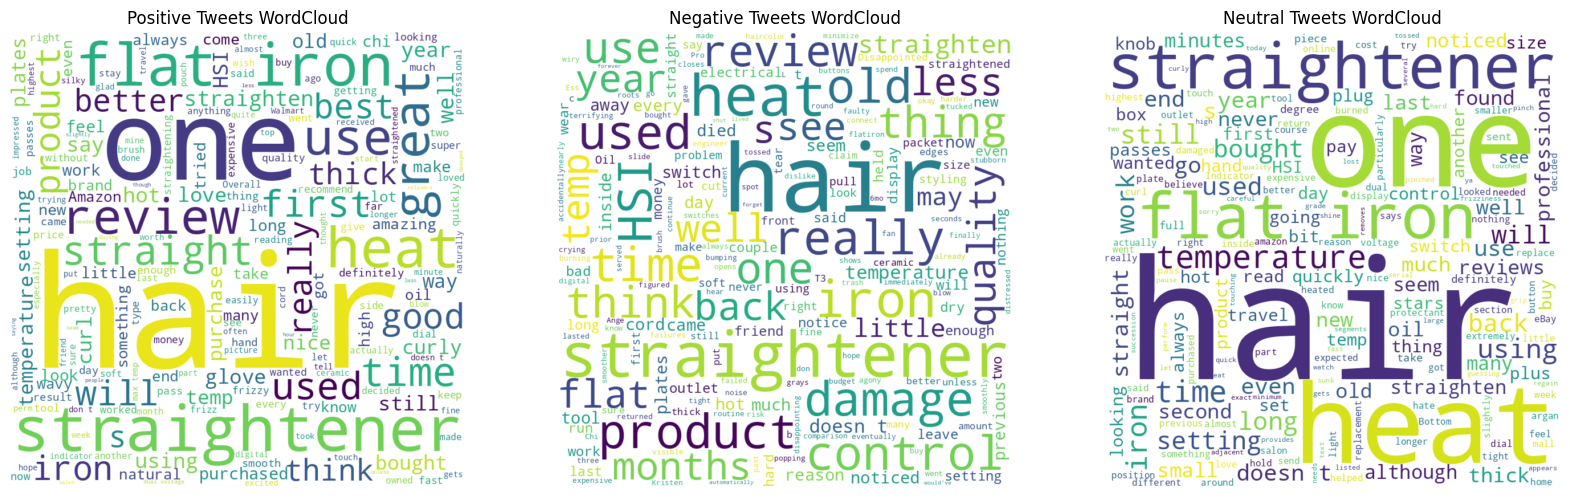

In [ ]:
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

        # Create a WordCloud for each sentiment category
        pos_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(pos_tweets))
        neg_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(neg_tweets))
        neu_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(neu_tweets))

        # Plot the WordClouds for each sentiment category
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
        ax1.imshow(pos_wordcloud, interpolation='bilinear')
        ax1.axis("off")
        ax1.set_title("Positive Tweets WordCloud")
        ax2.imshow(neg_wordcloud, interpolation='bilinear')
        ax2.axis("off")
        ax2.set_title("Negative Tweets WordCloud")
        ax3.imshow(neu_wordcloud, interpolation='bilinear')
        ax3.axis("off")
        ax3.set_title("Neutral Tweets WordCloud")
        plt.show()


#Sentiment analysis of reviews
We will start by importing the necessary libraries

In [ ]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install tensorflow keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade tensorflow keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Importing the data files
After importing the necessary libraries now we will read the data files. We have two data files here



In [ ]:
text_reviews=pd.read_csv("/content/drive/MyDrive/Project CSV/Project CSV/john_train_extracted_text.csv")
test_reviews=pd.read_csv("/content/drive/MyDrive/Project CSV/Project CSV/john_test_extracted_text.csv")

first data file contains the reviews and their corresponding sentiments which can be either positive or negative, we are going to use this file as our training data.

In [ ]:
text_reviews.head()

,serial,text,sentiment
0,0,John wick chapter 4 is the best of the John wi...,positive
1,1,John wick is a power house of action movie fra...,negative
2,2,"Greetings from Lithuania.\n\n""John Wick: Chapt...",positive
3,3,"If you want to watch fighting for 3H, beyond a...",negative
4,4,This movie is amazing on all levels.\n\nBest t...,positive


the second file is also similar to the first file but we are going to use it as the test data.

In [ ]:
test_reviews.head()

,serial,text,sentiment
0,0,Well thats what john wick movies are. If you f...,positive
1,1,Keanu always did what exactly he good in makin...,positive
2,2,John wick is a power house of action movie fra...,negative
3,3,"Greetings from Lithuania.\n\n""John Wick: Chapt...",positive
4,4,This is honestly the best John Wick film since...,positive


# Preprocessing the data
We can not pass the string data to our model directly, so we need to transform the string data into integer format.For this we can map each distinct word as a distinct integer for eg.{'this':14 , 'the':1}.We will create that file by using the below code after that, we are going to load that file.


**for word index**  run only once 

In [ ]:
import os
import pandas as pd

# Path of folder containing CSV files
folder_path = "/content/drive/MyDrive/Project CSV/Project CSV"

# Get all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Loop through all CSV files and extract unique words
unique_words = set()
for csv_file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv_file))
    for text in df['text']:
        words = set(text.split())
        unique_words = unique_words.union(words)

# Create word index dictionary
word_index = dict(zip(unique_words, range(len(unique_words))))

# Create DataFrame from word index dictionary
word_index_df = pd.DataFrame(word_index.items(), columns=['words', 'indexes'])

# Save DataFrame to CSV file
word_index_df.to_csv(os.path.join(folder_path, 'wordindex.csv'), index=False)


In [ ]:
word_index=pd.read_csv("/content/drive/MyDrive/Project CSV/Project CSV/wordindex.csv")

The word index file contains mapping from words to integers.

In [ ]:
word_index.head()

,words,indexes
0,predictable,0
1,impress,1
2,fantastic,2
3,"rushed,",3
4,re,4


Next we are going to convert the word_index dataframe into a python dictionary so that we can use it for converting our reviews from string to integer format.

In [ ]:
word_index=dict(zip(word_index.words,word_index.indexes))

In [ ]:
word_index["<PAD>"]=0
word_index["<START"]=1
word_index["<UNK>"]=2
word_index["<UNUSED>"]=3

load the embeding into memory 

In [ ]:
import numpy as np

embeddings_index = {}
with open('/content/drive/MyDrive/Project CSV/Project CSV/glove.6B.100d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

embedding_dim = 100


Creating an embedding matrix based on the words in our word index and the GloVe embeddings:

In [ ]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


Now we define a function review_encoder that encodes the reviews into integer format according to the mapping specified by word_index file.

In [ ]:
def review_encoder(text):
  arr=[]
  for word in text:
    if word in word_index:
      arr.append(word_index[word])
    else:
      arr.append(word_index["<OOV>"])
  return arr


We split the reviews from their corresponding sentiments so that we can preprocess the reviews and sentiments separately and then later pass it to our model.

In [ ]:
train_data,train_labels=text_reviews['text'],text_reviews['sentiment']
test_data, test_labels=test_reviews['text'],test_reviews['sentiment']

Before transforming the reviews as integers we need to tokenize or split the review on the basis of whitespaces
For eg.the string "The movie was wonderful" becomes ["The" , "movie" , "was" , "wonderful" ].

In [ ]:
train_data=train_data.apply(lambda review:review.split())
test_data=test_data.apply(lambda review:review.split())



In [ ]:
print(train_data)

0      [John, wick, chapter, 4, is, the, best, of, th...
1      [John, wick, is, a, power, house, of, action, ...
2      [Greetings, from, Lithuania., "John, Wick:, Ch...
3      [If, you, want, to, watch, fighting, for, 3H,,...
4      [This, movie, is, amazing, on, all, levels., B...
                             ...                        
170    [I, was, greatly, disappointed, with, #4., The...
171    [Oh, dear., This, was, truly, awful., I, loved...
172    [Exceptionally, boring,, there, is, nothing, g...
173    [I, never, go, see, films, on, release, day,, ...
174    [I, really, liked, the, first, 3., And, really...
Name: text, Length: 175, dtype: object


Since we have tokenized the reviews now we can apply the review_encoder function to each review and transform the reviews into integer format.

In [ ]:
train_data=train_data.apply(review_encoder)
test_data=test_data.apply(review_encoder)

After transforming, our reviews are going to look like this.

In [ ]:
train_data.head()

0    [11236, 5375, 5060, 3317, 1690, 5623, 10635, 9...
1    [11236, 5375, 1690, 6356, 8287, 6186, 9919, 50...
2    [5563, 8908, 3166, 11174, 5222, 7782, 3989, 66...
3    [553, 2970, 4416, 6430, 2646, 1062, 11489, 247...
4    [4978, 10322, 1690, 6597, 3577, 928, 5567, 978...
Name: text, dtype: object

We also need to encode the sentiments and we are labeling the positive sentiment as 1 and negative sentiment as 0.

In [ ]:
def encode_sentiments(x):
  if x=='positive':
    return 1
  else:
    return 0

train_labels=train_labels.apply(encode_sentiments)
test_labels=test_labels.apply(encode_sentiments)

Before giving the review as an input to the model we need to perform following preprocessing steps:

 


*   The length of each review should be made equal for the model to be working correctly.

*  We have chosen the length of each review to be 500. 
*     If the review is longer than 500 words we are going to cut the extra part of the review.


*       If the review is contains less than 500 words we are going to pad the review with zeros to increase its length to 500.























In [ ]:
train_data=keras.preprocessing.sequence.pad_sequences(train_data,value=word_index["<PAD>"],padding='post',maxlen=500)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,value=word_index["<PAD>"],padding='post',maxlen=500)

#Building the model
Our model is a neural network and it consits of the following layers : 

1.   one word embedding layer which creates word embeddings of length 16 from integer encoded review.
2.  second layer is global average pooling layer which is used to prevent overfitting by reducing the number of parameters.

1.   then a dense layer which has 16 hidden units and uses relu as activation function
2.  the final layer is the output layer which uses sigmoid as activation function 




In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(num_words, embedding_dim, input_length=500, weights=[embedding_matrix], trainable=False),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


#compiling the model


1.   Adam is used as optimization function for our model.
2.   Binary cross entropy loss function is used as loss function for the model.

1.   Accuracy is used as the metric for evaluating the model.





In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In the next step we are going to train the model on our downloaded IMDB dataset.

In [ ]:
#training the model
history = model.fit(train_data, train_labels, epochs=32, batch_size=512, validation_data=(test_data, test_labels))


Epoch 1/32
1/1 [==============================] - 0s 229ms/step - loss: 0.6159 - accuracy: 0.6609 - val_loss: 0.6000 - val_accuracy: 0.5200
Epoch 2/32
1/1 [==============================] - 0s 126ms/step - loss: 0.6153 - accuracy: 0.6609 - val_loss: 0.6009 - val_accuracy: 0.5200
Epoch 3/32
1/1 [==============================] - 0s 114ms/step - loss: 0.6147 - accuracy: 0.6609 - val_loss: 0.5991 - val_accuracy: 0.5200
Epoch 4/32
1/1 [==============================] - 0s 114ms/step - loss: 0.6141 - accuracy: 0.6609 - val_loss: 0.5971 - val_accuracy: 0.5200
Epoch 5/32
1/1 [==============================] - 0s 104ms/step - loss: 0.6134 - accuracy: 0.6609 - val_loss: 0.5991 - val_accuracy: 0.5200
Epoch 6/32
1/1 [==============================] - 0s 118ms/step - loss: 0.6127 - accuracy: 0.6609 - val_loss: 0.5978 - val_accuracy: 0.5200
Epoch 7/32
1/1 [==============================] - 0s 138ms/step - loss: 0.6121 - accuracy: 0.6609 - val_loss: 0.5941 - val_accuracy: 0.5200
Epoch 8/32
1/1 [====

Now we will be evaluating the loss and accuracy of our model on testing data.

In [ ]:
loss,accuracy=model.evaluate(test_data,test_labels)

1/1 [==============================] - 0s 31ms/step - loss: 0.5756 - accuracy: 0.5600


Now we are going to take a random review from our test dataset and check wether our model produces correct output or not

In [ ]:
index=np.random.randint(1,25)
user_review=test_reviews.loc[index]
print(user_review)


serial                                                       3
text         Greetings from Lithuania.\n\n"John Wick: Chapt...
sentiment                                             positive
Name: 3, dtype: object


As we can see the sentiment for the above review is positive, now we are going to take the integer format of this particular review which we already have in our preprocessed test data and then give it as an input to our model to check the prediction of our model.

In [ ]:
user_review=test_data[index]
user_review=np.array([user_review])

if (model.predict(user_review)>0.5).astype("int32"):
  print("positive sentiment")
else:
  print("negative sentiment")


1/1 [==============================] - 0s 44ms/step
positive sentiment


As we can see our model is now able to predict the sentiment of the review.